## What is Fastfuels?

It's a dataset describing 3D fuelscapes for the contiguous US and the fuel input for the QuicFire model

<div>
<img src="imgs/fastfuels.png" width="500" /> <img src="imgs/fastfuels-quicfire.png" width="500"/>
</div>
(left) - FastFuels Example Data; (right) - FastFuels-QuicFire model output

**references:** 
- https://burnpro3d.sdsc.edu/
- https://wifire-data.sdsc.edu/
- https://www.firelab.org/project/fastfuels-3d-fuels-next-generation-fire-models
- FastFuels Example Data demo: https://www.firelab.org/media/911
- FastFuels-QuicFire demo: https://www.firelab.org/media/912

## Accessing FastFuels dataset

reference:  https://pypi.org/project/fastfuels/

### Installation
install FastFuels and other dependencies 

In [1]:
# install dependencies
!pip3 install fastfuels==0.5.3  s3fs==0.5.2 fsspec==0.8.3 

Traceback (most recent call last):
  File "C:\Users\krish\anaconda3\Scripts\pip3-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\krish\anaconda3\lib\site-packages\pip\_internal\cli\main.py", line 8, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\krish\anaconda3\lib\site-packages\pip\_internal\cli\autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\krish\anaconda3\lib\site-packages\pip\_internal\cli\main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "C:\Users\krish\anaconda3\lib\site-packages\pip\_internal\cli\cmdoptions.py", line 22, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "C:\Users\krish\anaconda3\lib\site-packages\pip\_internal\cli\progress_bars.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "C:\Users\krish\an

In [2]:
import fastfuels
import matplotlib.pyplot as plt

### Connecting to a .fio resource

A .fio resource is a directory-in-file object where important metadata and fuel arrays are stored. You can open a .fio resource  stored remotely if you have the appropriate credentials.

In [4]:
fio = fastfuels.open('https://wifire-data.sdsc.edu:9000/fastfuels/index.fio', ftype='s3', username='fastfuels', password='Treatment##Buffet')
fio.cache_limit = 1e14

### Let's choose a location to explore the dataset such as the Dixie Fire in Lassen National Forest 
https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire/

In [17]:
# Dixie Fire location in Lassen National Forest (https://www.fire.ca.gov/incidents/2021/7/13/dixie-fire/) 
# minx, miny = -122, 39 maxx, maxy = -121.99, 39.01
lat = 39.01
lon = -121.99

# this command will return a square kilometer of fuels (radius=500 meters)
roi = fio.query(lon, lat, 30)

Bounding box query found in single source: ca.fio


### Viewing fuels in 3D

Fuel parameter arrays can be viewed interactively in 3D. To see the available parameters run

In [18]:
print(roi.get_properties())

['bulk_density', 'sav', 'moisture', 'fuel_depth', 'elevation']


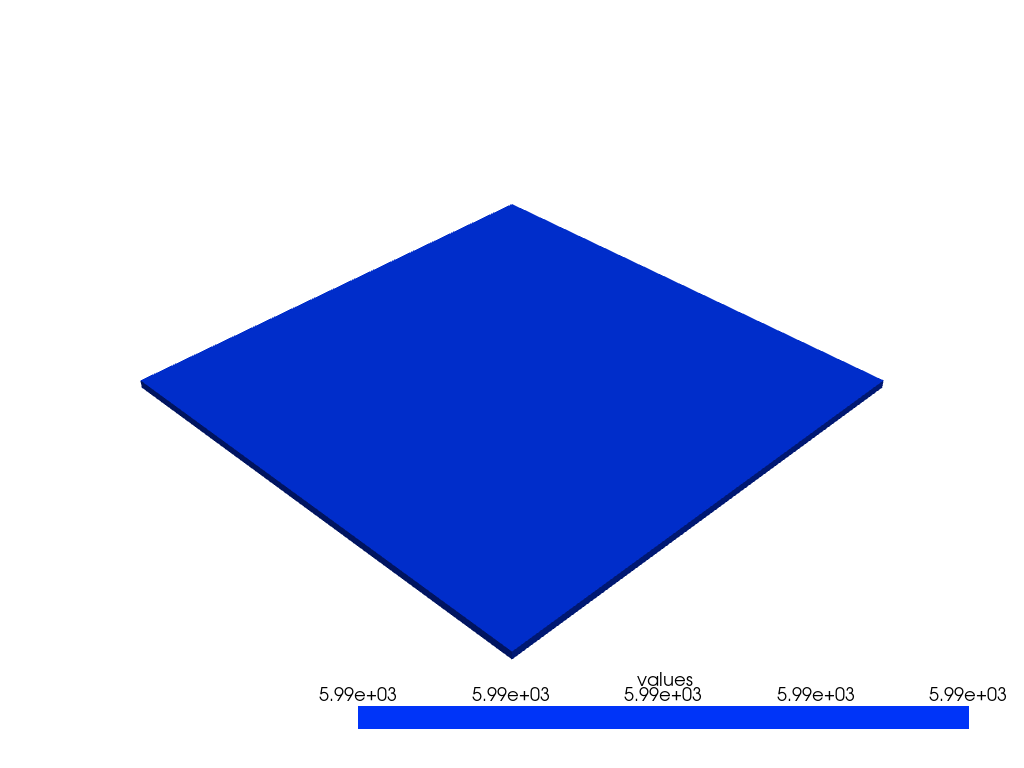

In [19]:
# sav = surface-area-to-volume
roi.view('sav')

### let's look at the voxel data (each voxel is 1 m^3)

In [20]:
def get_voxel(lat, long, index):
    # this command will return a square kilometer of fuels (radius=500 meters)
    roi = fio.query(lon, lat, 50)
    
    raw_sav_data = roi.data_dict['sav']
    raw_moisture_data = roi.data_dict['moisture']
    raw_elevation_data = roi.data_dict['elevation']
    
    return raw_sav_data[:,:, ], raw_moisture_data[:,:, ], raw_elevation_data

I will approach this problem by looking at the characteristics of the water, chaparral, and grass. First I will do a general human observation at the numbers, then I will apply machine learning methods to distinguish the characteristics between these geographical features.

In [21]:
# Grass
get_voxel(42.870074, -118.883789, 0)

Bounding box query found in single source: or_set/or_84.fio


(array([[[5145.098 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5145.098 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5113.7256,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [2949.0198,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [3074.5098,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [3231.3726,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ]],
 
        [[5145.098 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5113.7256,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5113.7256,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [2854.902 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [3011.7646,    0.    ,    0.    , ...,  

In [22]:
# Water
get_voxel(41.945303, -120.421964, 0)

choosing ca.fio


(array([[[5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [4925.49  ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [4862.745 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [4831.3726,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ]],
 
        [[5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5898.0396,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [4925.49  ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [4862.745 ,    0.    ,    0.    , ...,  

In [23]:
# Chaparral
get_voxel(41.721199, -121.131449, 0)

Bounding box query found in single source: ca.fio


(array([[[5866.667 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5866.667 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5866.667 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [5458.8237,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5490.1963,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5521.569 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ]],
 
        [[5866.667 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5866.667 ,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5835.2944,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         ...,
         [5458.8237,    0.    ,    0.    , ...,    0.    ,    0.    ,
             0.    ],
         [5490.1963,    0.    ,    0.    , ...,  

# Approach:
1. Find the averages of the sav and moisture. This is ONLY based on a general assumption that both factors are related.
2. Use the averages of the sav and moisture values, plot a scatter plot to visualize the relationship.
3. Use KMeans to divide the values into 3 clusters, water, grass, and chaparral.
4. Use the labels in KMeans to add to the data dictionary.

In [24]:
# 1
mean_list = []

for long in range(-124000, -117000, 500):
    for lat in range(42000, 45000, 500):
        print(long,lat)
        mean_list.append([get_voxel(lat/1000, long/1000, 0)[0].mean(), get_voxel(lat/1000, long/1000, 0)[1].mean()])

-124000 42000
choosing ca.fio
choosing ca.fio
-124000 42500
choosing ca.fio
choosing ca.fio
-124000 43000
Bounding box query found in single source: or_set/or_84.fio
Bounding box query found in single source: or_set/or_84.fio
-124000 43500
Bounding box query found in single source: or_set/or_69.fio
Bounding box query found in single source: or_set/or_69.fio
-124000 44000
Bounding box query found in single source: or_set/or_53.fio
Bounding box query found in single source: or_set/or_53.fio


KeyboardInterrupt: 

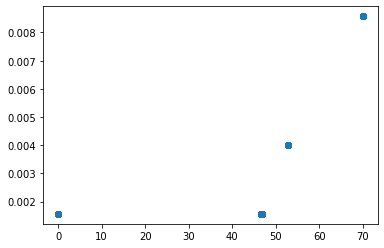

In [201]:
#2
plt.scatter([x[0] for x in mean_list], [x[1] for x in mean_list])

In [202]:
#3
from sklearn.cluster import KMeans
import numpy as np
X = np.array(mean_list)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0])

In [ ]:
#4 Append the result into the data dictionary

In [81]:
#['bulk_density', 'sav', 'moisture', 'fuel_depth', 'elevation']